In [50]:
#Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%pylab inline

# x = (hours sleeping, hours doing excercies), y = average age of living

X = np.array(([10,2],[5,8],[7,1]), dtype=float)
y = np.array(([85],[60],[65]), dtype=float)


Populating the interactive namespace from numpy and matplotlib


In [51]:
X = X/np.amax(X, axis=0)
y = y/100 #Max age is 100

In [52]:
X

array([[1.   , 0.25 ],
       [0.5  , 1.   ],
       [0.7  , 0.125]])

In [53]:
y

array([[0.85],
       [0.6 ],
       [0.65]])

In [54]:
print(X.shape, y.shape)

(3, 2) (3, 1)


In [55]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

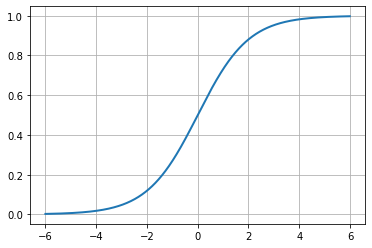

In [56]:
testInput = np.arange(-6,6,0.01)
plot(testInput, sigmoid(testInput), linewidth= 2)
grid(1)

In [57]:
sigmoid(1)

0.7310585786300049

In [58]:
sigmoid(np.array([-1,0,1]))

array([0.26894142, 0.5       , 0.73105858])

In [59]:
sigmoid(np.random.randn(3,3))

array([[0.67002583, 0.39644   , 0.467609  ],
       [0.69953825, 0.84253861, 0.69127948],
       [0.24642164, 0.61508044, 0.76287376]])

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X = np.array(([10,2], [5,0], [7,1]), dtype=float)
y = np.array(([85], [60], [65]), dtype=float)

X = X/np.amax(X, axis=0)
y = y/100 #Max age is 100

class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yo = self.sigmoid(self.z3) 
        return yo
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(z):
    #Derivative of sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
NN = Neural_Network()
yo = NN.forward(X)

In [61]:
yo

array([[0.7695233 ],
       [0.69188879],
       [0.73312701]])

In [62]:
y

array([[0.85],
       [0.6 ],
       [0.65]])

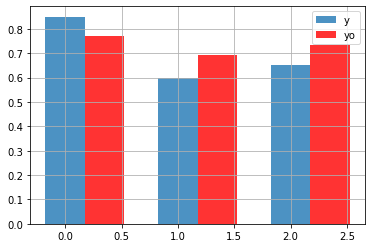

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#Compare estimate, yo, to actual output
bar([0,1,2], y.flatten(), width = 0.35, alpha=0.8)
bar([0.35,1.35,2.35],yo.flatten(), width = 0.35, color='r', alpha=0.8)
grid(1)
legend(['y', 'yo'])

In [64]:
import time

weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros(1000)

startTime = time.process_time()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yo = NN.forward(X)
    costs[i] = 0.5*sum((y-yo)**2)
    
endTime = time.process_time()

In [65]:
timeElapsed = endTime-startTime
timeElapsed

0.015625

Text(0.5, 0, 'Weight')

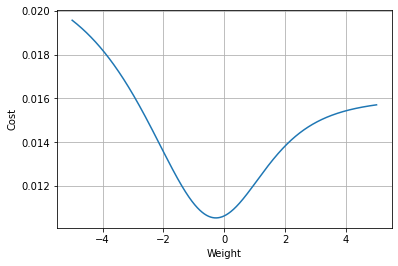

In [66]:
plot(weightsToTry, costs)
grid(1)
ylabel('Cost')
xlabel('Weight')

In [67]:
weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros((1000, 1000))

startTime = time.process_time()
for i in range(1000):
    for j in range(1000):
        NN.W1[0,0] = weightsToTry[i]
        NN.W1[0,1] = weightsToTry[j]
        yo = NN.forward(X)
        costs[i, j] = 0.5*sum((y-yo)**2)
    
endTime = time.process_time()

In [68]:
timeElapsed = endTime-startTime
timeElapsed

16.1875

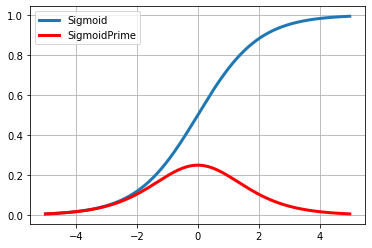

In [69]:
def sigmoidPrime(z):
    #Derivative of sigmoid function
    return np.exp(-z)/((1+np.exp(-z))**2)

testValues = np.arange(-5,5,0.01)
plt.plot(testValues, sigmoid(testValues), linewidth=3)
plt.plot(testValues, sigmoidPrime(testValues), linewidth=3, c='r')
grid(1)
legend(['Sigmoid', 'SigmoidPrime'])

In [104]:
# Whole Class with additions:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yo = self.sigmoid(self.z3) 
        return yo
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yo = self.forward(X)
        J = 0.5*sum((y-self.yo)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yo = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yo), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))
    
    

In [105]:
NN = Neural_Network()
cost1 = NN.costFunction(X,y)
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

In [106]:
dJdW1

array([[ 0.02717074, -0.03265904,  0.00886839],
       [ 0.02011353, -0.02576834,  0.00575128]])

In [107]:
dJdW2

array([[-0.17060626],
       [-0.09445187],
       [-0.19462517]])

In [108]:
scalar = 3
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [109]:
print(cost1, cost2)

0.2098544977928575 0.44842192904585865


In [110]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
NN.W1 = NN.W1 - scalar*dJdW1
NN.W2 = NN.W2 - scalar*dJdW2
cost3 = NN.costFunction(X, y)

In [111]:
print(cost2, cost3)

0.44842192904585865 0.23304814822542314


In [112]:
from scipy import optimize

class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [113]:
NN = Neural_Network()

In [114]:
T = trainer(NN)

In [115]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 91
         Function evaluations: 102
         Gradient evaluations: 102


Text(0, 0.5, 'Cost')

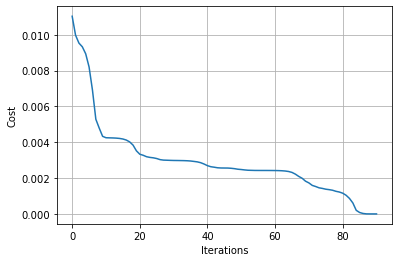

In [116]:
plot(T.J)
grid(1)
xlabel('Iterations')
ylabel('Cost')

In [ ]:
NN.costFunctionPrime(X,y)

In [117]:
NN.forward(X)

array([[0.84999747],
       [0.60000006],
       [0.64999819]])

In [118]:
y

array([[0.85],
       [0.6 ],
       [0.65]])

In [123]:

#Test network for various combinations of sleep/exercising:
hoursSleep = linspace(0, 10, 100)
hoursExcercising = linspace(0, 5, 100)

#Normalize data (same way training data way normalized)
hoursSleepNorm = hoursSleep/10.
hoursExcercisingNorm = hoursExcercising/5.

#Create 2-d versions of input for plotting
a, b  = meshgrid(hoursSleepNorm, hoursExcercisingNorm)

#Join into a single input matrix:
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [124]:
allOutputs = NN.forward(allInputs)

Text(0, 0.5, 'Hours for exercising')

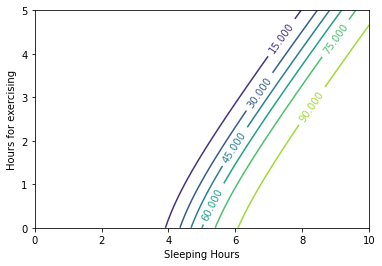

In [128]:
#Contour Plot:
yy = np.dot(hoursExcercising.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Sleeping Hours')
ylabel('Hours for exercising')